# Code for creating Figure 1

In [7]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pymodulon.compare import *
from tqdm.notebook import tqdm
from matplotlib_venn import venn3

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['font.family'] = 'sans-serif'
sns.set_style('ticks')
matplotlib.rcParams['text.color'] = '#000000'
matplotlib.rcParams['axes.labelcolor'] = '#000000'
matplotlib.rcParams['xtick.color'] = '#000000'
matplotlib.rcParams['ytick.color'] = '#000000'

In [8]:
# Load ICA object 
ica_PS = load_json_model('p_syringae_2.json')

### Figure 1A: 
Obtained from https://doi.org/10.1101/2021.07.01.450581

### Figure 1B 
Created on BioRender (https://biorender.com/)

### Figure 1C
Created on Microsoft Excel (https://www.microsoft.com/en-us/microsoft-365/excel)

### Figure 1D

In [53]:
# Genes differentially activated in AlgU overexpression strain (https://journals.asm.org/doi/10.1128/JB.00276-16)
s = pd.read_excel('algU_regulon_2.xlsx')
s = s.set_index('Locus')

#total genes present in both s and in gene table
count = 0

#genes in s and in AlgU iM
algU_genes = []
algU_genes_count = 0
for idx, row in s.iterrows():
    if idx in ica_PS.gene_table.index.values:
        count += 1
#         print(idx, ':', ica_PS.imodulons_with(idx))
        if 'AlgU' in ica_PS.imodulons_with(idx):
            algU_genes_count += 1
            algU_genes.append(idx)

#core regulon gene members (https://journals.asm.org/doi/10.1128/JB.00276-16)
reg_mem = ['PSPTO_0152','PSPTO_0462','PSPTO_0463', 'PSPTO_0464','PSPTO_1631','PSPTO_1632','PSPTO_1633', 
           'PSPTO_3176','PSPTO_4575', 'PSPTO_4576', 'PSPTO_4577','PSPTO_4578','PSPTO_0675','PSPTO_1232',
           'PSPTO_1233','PSPTO_1234', 'PSPTO_1235','PSPTO_1236', 'PSPTO_1237', 'PSPTO_1238','PSPTO_1239',
           'PSPTO_1240','PSPTO_1241','PSPTO_1242','PSPTO_1243']

In [54]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

print('AlgU iM unique genes:',ica_PS.view_imodulon('AlgU').shape[0] - len(intersection(s.index.tolist(), algU_genes)))
print('unique genes in the differentially expressed gene list:', count - len(intersection(s.index.tolist(), algU_genes))-len(reg_mem) +len (intersection(algU_genes, reg_mem)))
print('genes only shared by differentially expressed gene list and AlgU iM:', len(intersection(s.index.tolist(), algU_genes)) - len(intersection(algU_genes, reg_mem)))
print('genes shared by differentially expressed gene list and the core regulon:',len(intersection(s.index.tolist(), reg_mem)))
print('genes shared by AlgU iM and the core regulon:',len(intersection(algU_genes, reg_mem)))
print('genes only shared by core regulon and differentially expressed gene list:', len(reg_mem) - len(intersection(algU_genes, reg_mem)))

AlgU iM unique genes: 49
unique genes in the differentially expressed gene list: 668
genes only shared by differentially expressed gene list and AlgU iM: 183
genes shared by differentially expressed gene list and the core regulon: 25
genes shared by AlgU iM and the core regulon: 21
genes only shared by core regulon and differentially expressed gene list: 4


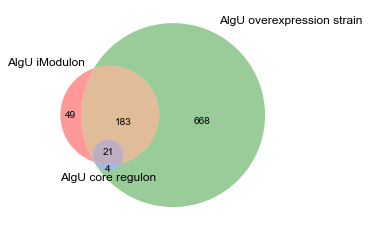

In [55]:
venn3(subsets = (49, 668, 183, 0, 0, 4, 21), set_labels = ('AlgU iModulon', 'AlgU overexpression strain','AlgU core regulon'))

## Figure 1E
Created on Biorender (https://biorender.com/)

# Figure 1F
#### AlgU activity plots

C:\Users\99hee\AppData\Local\Programs\Python\Python310\lib\site-packages\pymodulon\plotting.py:111: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bar_vals = metadata.groupby("x").mean()


<AxesSubplot: ylabel='AlgU iModulon\nActivity'>

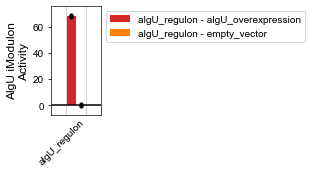

In [5]:
plot_activities(ica_PS, 'AlgU', projects = 'algU_regulon')

(-15.0, 70.0)

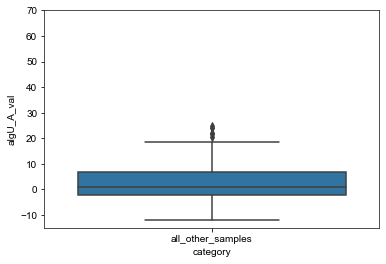

In [6]:
# creating a dataframe of all samples, activity level in the AlgU iModulon, and category (AlgU deletion strain --> del_algU;
# AlgU overexpression strain --> algU_overexpression; all oher samples --> all other samples)

algU_df = pd.DataFrame(columns = ['sample','algU_A_val','category'])
algU_df['sample'] = ica_PS.sample_table.index.values

for idx, row in algU_df.iterrows():
    algU_df.loc[idx, 'algU_A_val'] = ica_PS.A.loc['AlgU',algU_df.loc[idx, 'sample']]
    if ica_PS.sample_table.loc[algU_df.loc[idx, 'sample'], 'condition_name'] == 'algU_overexpression':
        algU_df.loc[idx, 'category'] = 'algU_overexpression'
    elif ica_PS.sample_table.loc[algU_df.loc[idx, 'sample'], 'condition_name'] == 'empty_vector':
        algU_df.loc[idx, 'category'] = 'del_algU'
    else:
        algU_df.loc[idx, 'category'] = 'all_other_samples'

# plotting boxplot 

ax =sns.boxplot(data = algU_df, y = 'algU_A_val', x = 'category', order = ['all_other_samples'])
ax.set_ylim([-15, 70])